<a href="https://colab.research.google.com/github/afirdousi/pytorch-basics/blob/main/007_computer_vision_hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
# Vision in PyTorch
# Docs: https://pytorch.org/vision/stable/index.html

In [104]:
# torchvision: is the baseline domain library  for PyTorch computer vision
# torchvision.datasets: get datasets and data loading functions
# torchvision.models: get pretrained computer vision models that can be leveraged for your own problems
# torchvision.transforms: function for manipularting your vision data (images) to be suitable/compatable for use with an ML model
# torch.utils.data.Dataset: base dataset class for PyTorch
# torch.utils.data.DataLoader: create a pytorch iterable over a dataset

In [105]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms # (Read: https://pytorch.org/vision/stable/transforms.html)
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using PyTorch version = { torch.__version__ }")
print(f"Using device = { device }")  # We will be doing device agnostic code in this tutorial

Using PyTorch version = 2.0.1+cu118
Using device = cuda


In [106]:
# Getting Computer Vision Dataset and exploring the structure
# We will be using Fashion MNIST:
### On Github: https://github.com/zalandoresearch/fashion-mnist
### On Kaggle: https://www.kaggle.com/datasets/zalando-research/fashionmnist
### Also check built in PyTorch datasets here: https://pytorch.org/vision/main/datasets.html
##### It also has https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

# Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples
# and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
# Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset
# for benchmarking machine learning algorithms.
# It shares the same image size and structure of training and testing splits.

# Original MNIST: https://en.wikipedia.org/wiki/MNIST_database

In [107]:
# Setup Training Data
train_data = datasets.FashionMNIST(
    root = "data", # which folder to download data to
    train = True, # all/most of built in datasets in PyTroch are already divided into train and testing datasets
    download = True, # do want to download?
    transform = torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform = None #. how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform= None
)

# You can read up on ToTensor() here:
# https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html

# Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a
# torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
# if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1)
# or if the numpy.ndarray has dtype = np.uint8

In [108]:
# Check the data folder now on this collab

In [109]:
# Lets check out our data

len(train_data), len(test_data)

(60000, 10000)

In [110]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [111]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [112]:
test_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [113]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [114]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [115]:
# Check the shape of our image
image, label = train_data[0]
image.shape, label

# observe input is in the form [channel, height, width]
# Fashion MNIST is a gray scale dataset, grayscale images have one color channel 1 is white 0 is black

# output/labels is a single number corresponding to the category 'Ankle boot'

(torch.Size([1, 28, 28]), 9)

In [116]:
train_data.classes[9]

'Ankle boot'

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

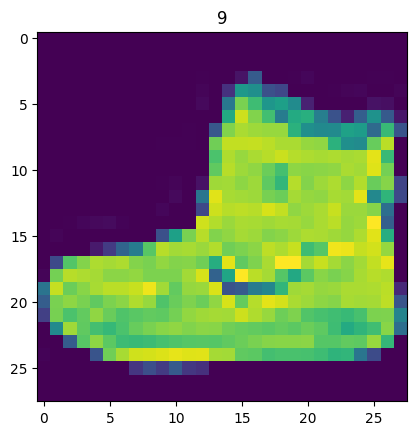

In [117]:
# Visualize image

image, label = train_data[0] # take first image in training data
print(f"Image shape: { image.shape }")

# Render image

# plt.imshow(image)
# uncomment and run this, it will throw an error
# TypeError("Invalid shape {} for image data"
# because imshow() expects width and height but we are giving it color channel, width and height

# lets remove the first dimension. how? remember sequeeze?
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

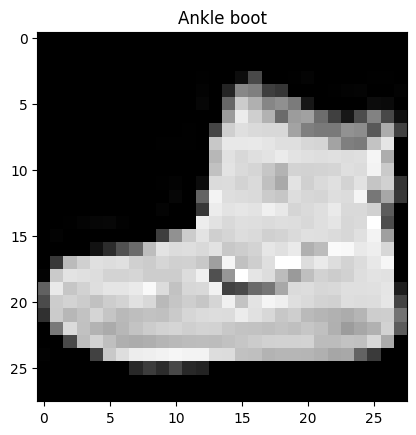

In [118]:
# Lets plot this in gray scale, use cmap

plt.imshow(image.squeeze(), cmap = "gray")
plt.title(train_data.classes[label])

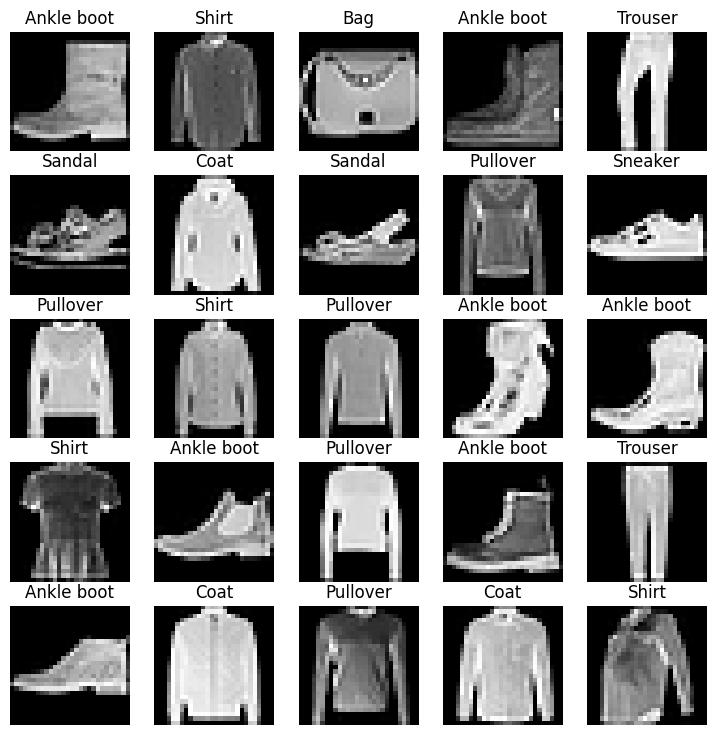

In [119]:
# Plot more random images

torch.manual_seed(42) # comment if you want new random images selected every time
fig = plt.figure(figsize=(9,9))
rows, cols = 5, 5

for i in range(1, rows * cols + 1 ):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  # print(random_idx)
  image, label = train_data[ random_idx ]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap = "gray")
  plt.title(train_data.classes[label])
  plt.axis(False)

In [120]:
# Observe if some of the image types look the same
# Think about if we get confused recognizing or differentiating them, how will our model differentiate

In [121]:
# THINK: Do you think these items in Fashion MNIST could be modelled with pure linear lines? Or do you think we will need non-linearity?

In [122]:
# Now we will convert our data set into a Data Loader
# Data Loader converts a data into PyTorch iterable

# More specifically, we want to turn our data into batches (mini batches)

In [123]:
# Lets check data again
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [124]:
# Why batches?

# 1. 60,000 is not a lot of data generally in Deep Learning terms
# But we would want to batch this data for training in view of the
# Computer and RAM it would need to train the data at any given point

# 2. Gives our neural network more chances to update its gradient per epoch
# i.e the model gets updated (the internal parameters like weights and biases) every single epoch

# Common batch size is 32 for basic problems like this

# Watch this and other resources you can google to understand mini batch
# https://www.youtube.com/watch?v=yFPLyDwVifc


# Since we have 60,000 images for training, with 32 images per epoch
# 60,000/32 = 1875 epochs needed to train

In [125]:
from torch.utils.data import DataLoader

# Setup batch size hyperparameter
BATCH_SIZE = 32

train_dataloader = DataLoader( dataset = train_data,
                               batch_size = BATCH_SIZE,
                               # if the data is such that it has grouped similar items or same category together, Shuffle makes sure to mix it up for training
                               shuffle = True)

test_dataloader = DataLoader( dataset = test_data,
                               batch_size = BATCH_SIZE,
                               shuffle = False) # For evaluation, the order doesn't really matter even if same type of data comes in sequence

# Read: https://pytorch.org/docs/stable/data.html

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d7345232dd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d7345232ef0>)

In [126]:
print(f"Train Data Loaders: { train_dataloader } ")
print(f"Train Data Loaders length: { len(train_dataloader) } ")
print(f"Test Data Loaders length: { len(test_dataloader) } ")

# These numbers would change if we change the batch size

Train Data Loaders: <torch.utils.data.dataloader.DataLoader object at 0x7d7345232dd0> 
Train Data Loaders length: 1875 
Test Data Loaders length: 313 


In [127]:
# What's inside the training data loader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

# Check output
# 32 batch size
# 1 channel color
# 28x28 size H, W
# output has 32 labels associated with 32 samples

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 4, label size: torch.Size([])


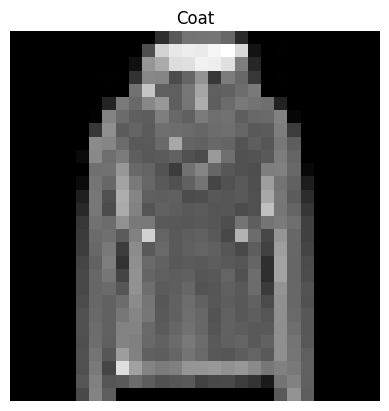

In [128]:
# How do we visualize a single image in a batch i.e visualize one random sample
# Since we have done one iter() over our data, meaning it has the first batch
# and we can visualize any of the 32 images in the batch now

# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[ random_idx ], train_labels_batch[ random_idx ]
plt.imshow(img.squeeze(), cmap="gray")
# plt.title(class_name[label])
plt.title(train_data.classes[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: { label.shape}")

In [129]:
# Create Model with 2 Linear Layers
# When starting to create models to solve a problem, start with creating a simple baseline model

# A baseline model is a simple model you will try to improve upon with subsequent models/experiments

In [130]:
# We will start to see a new type of layer called Flatten layer
# Read: https://pytorch.org/docs/stable/generated/torch.flatten.html


# Create a Flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Check shape
x.shape


torch.Size([1, 28, 28])

In [131]:
# Flatten the sample
output = flatten_model(x) # performs forward pass

output.shape # its literally one big vector now 28 x 28 - 784 -- think of situations where we have data from multiple machines like a AV

torch.Size([1, 784])

In [132]:
output[:1]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0196, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0157, 0.0000, 0.0157, 0.0039, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0039, 0.0000, 0.1490, 0.4667, 0.5098, 0.5373, 0.4941, 0.4824, 0.5137,
         0.5490, 0.5137, 0.1294, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0039,
         0.0157, 0.0000, 0.2353, 0.5255, 0.1765, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0235, 0.1686, 0.4745, 0.3647, 0.0000, 0.0314, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [133]:
# Create a model that flattens images

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units
                  ),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape
                  )
    )

  def forward(self, x):
    return self.layer_stack(x)

# Observe we don't have any non-linearities
# We have nn.Flatten that does not learn anything and then have 2 linear layers that would learn the patterns

In [134]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape = 784, # this is 28x28
    hidden_units = 10, # how many neurons in the hidden layer
    output_shape = len(train_data.classes) # one for every class
).to("cpu") # for now we are doing it on CPU, will write device agnostic later

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [135]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [136]:
dummy_x = torch.rand([1,1,28,28]) # batch of 1 , color channel 1 , height = width = 28
dummy_x

tensor([[[[0.0851, 0.8142, 0.2461, 0.7762, 0.4256, 0.2940, 0.8762, 0.4034,
           0.2302, 0.4234, 0.1820, 0.0186, 0.4124, 0.4718, 0.2150, 0.9432,
           0.3883, 0.3730, 0.8962, 0.5556, 0.3824, 0.6150, 0.0482, 0.9916,
           0.6319, 0.6758, 0.1312, 0.8823],
          [0.0891, 0.3263, 0.1794, 0.2475, 0.6067, 0.0041, 0.0105, 0.6142,
           0.6648, 0.5072, 0.3100, 0.3601, 0.4309, 0.3986, 0.1907, 0.8764,
           0.6012, 0.1655, 0.3984, 0.1382, 0.2079, 0.8798, 0.6526, 0.7190,
           0.4351, 0.3752, 0.5646, 0.1448],
          [0.0025, 0.8515, 0.5102, 0.8033, 0.8762, 0.7187, 0.3291, 0.4083,
           0.4739, 0.5299, 0.5194, 0.1091, 0.2251, 0.8644, 0.5160, 0.2733,
           0.8380, 0.3516, 0.2966, 0.8494, 0.1055, 0.2605, 0.8784, 0.4511,
           0.2938, 0.9149, 0.5761, 0.0302],
          [0.1303, 0.3732, 0.4726, 0.1235, 0.3116, 0.6690, 0.0337, 0.0314,
           0.6300, 0.5954, 0.0171, 0.0348, 0.9154, 0.9990, 0.2815, 0.9981,
           0.8453, 0.9444, 0.2848, 0.3776, 

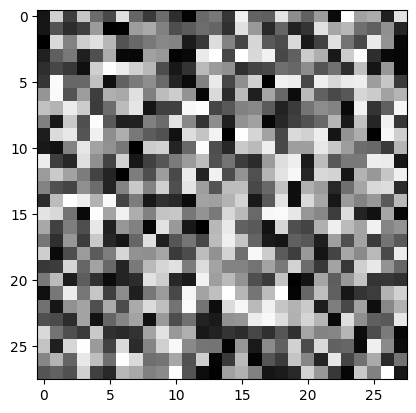

In [137]:
# We will assume that this is a dummy picture
plt.imshow(dummy_x.squeeze(), cmap="gray") # sice this is random numbers, the image is a funny mix of dots

In [138]:
# lets pass this picture through the model
model_0(dummy_x) # this will send the dummy_x through the forward method deifned in FashionMNISTModelV0
# we get the output of 10 logits ... 1 logit per output class

# creating this dummy_x and passing this to our model and then checking that it correctly outputs 10 things
# this is a good way to check that the model is setup properly and outputs the same number of neurons that we expected

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [139]:
# Alright, moving on we wil consier this model_0 as our basline model
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [140]:
# these weights and biases are random numbers but as we train, they will learn the features in our data corresponding to a particular label
# Features could be the rounded handle of a bag, the straight line of a shirt and so on
# We will tell our model which featues to learn

In [141]:
# We will consider this model_0 as our baseline

In [142]:
# 1. Setup loss function (since we are working with multi class data, loss function will be nn.CrossEntropyLoss())

# 2. Setup optimizer (we can use torch.optim.SDG() i.e stocastic gradient descent)

# 3. Setup evaluation metrics (since we are working on a classification problem, we can use accuracy as our metric)
# Read: https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226
# We don't have to write our own function for these metric, we can use the ones implemented in torchmetrics
# https://torchmetrics.readthedocs.io/en/stable/

In [143]:
# Step#3: For now we will redefine accuracy (later we will use torchmetrics or sklearn for metric)
def accuracy_func(y_true, y_pred): # any evaluation func will compare predictions to ground truth labels
  correct = torch.eq(y_true, y_pred).sum().item() # .item() gets single value, try to test returning .sum()
  acc = (correct/len(y_pred)) * 100
  return acc

In [144]:
# Step#1: Setup loss function (since we are working with multi class data, loss function will be nn.CrossEntropyLoss())
loss_func = nn.CrossEntropyLoss()

# Step#2: Setup optimizer (we can use torch.optim.SDG() i.e stocastic gradient descent)
optimizer = torch.optim.SGD( params = model_0.parameters(),
                            lr = 0.1)

In [145]:
# Now lets creating a function to time our experiments

# ML is heavily experimental in nature.
# There are 2 main thing you will often want to track:
# 1. Model's performance (loss and accuracy values etc)
# 2. How fast the model runs

In [146]:
from timeit import default_timer as timer # this is pure Python timing function (not PyTorch's)
# check https://docs.python.org/3/library/timeit.html

def print_train_time( start: float,
                     end: float,
                      device: torch.device = None): # since we want to test how fast our model runs on cpu vs gpu
  """Prints diff between start and end time."""
  total_time = end - start
  print(f"Train time on { device} : { total_time:.3f} seconds")

# test
print_train_time(4.3, 5.8, 'cpu')


Train time on cpu : 1.500 seconds


In [147]:
# test with timer()

start_time = timer()
# this is where all the train of the ML model will go
# right now when we run this it will take almost no time to run start and end lines
end_time = timer()
print_train_time( start = start_time, end= end_time, device = 'cpu')

Train time on cpu : 0.000 seconds


In [148]:
# now lets create training and testing loop for our baseline model model_0
# this will be creating a training loop that will run on batches of data

# Note: The optimizer will update the model's parameters once per batch rather than once per epoch...

In [149]:
# Creating a training loop and training the model on batches of data

# 1. Loop throuhg epochs
# 2. Loop through training batches, perform training steps, calculate the train loss per batch
# 3. Loop through testing batches, perform testing steps, calculate the test loss per batch
# 4. print the current state i.e print whats happening
# 5. time it all (to learn and to have some fun)

# Import tqdm for progress bar
# TQDM is a fast python progress bar: https://github.com/tqdm/tqdm

In [150]:
from tqdm.auto import tqdm

# set the seed and start timer (will check how long entire cell takes to run)
torch.manual_seed(42)
train_time_start_on_cpu = timer() # remember we use .to('cpu') on purpose. later will test on GPU

# set the number of epochs (we will keep this small for faster training time )
# in the beginning you would keep this small to try out different things
epochs = 5

# create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n -------------------------") # epoch number we are on

  ### Training

  train_loss = 0 # instantiate train_loss
  # we will calculate training loss per batch and finally we will divide
  # total train loss with number of batches to get average loss

  # Add a loop to loop through the training batches

  for batch, (X, y) in enumerate(train_dataloader): # X is one image tensor, y is the label
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calcualte the loss(per batch)
    loss = loss_func(y_pred, y)
    train_loss += loss # accumelate train loss across all 1800+ whatever number of batches we have

    # 3. Optimzer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()
    # optimizing/updating model parameters once per batch which is only 32 images (can be any number of images)
    # rather than waiting for the model to see the entire data set of 60,000+ images in FashionMNIST
    # so the model gets better every batch instead of every epoch since it is at the batch level

    # 5. Print out what's happening
    if batch % 400 == 0: # since we have 1800+ batches, just want to print a few
      print(f"Looked at {batch * len(X)}/{ len(train_dataloader.dataset)} samples.")

  # 5. Print out what's happening (epoch level as we are out of our batch loop)
  # Average trainining loss per epoch
  train_loss /= len(train_dataloader)

  # TODO: We havent coded accuracy for testing but you can do it. We wil do it for Testing only

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:

      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_func(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_func(y_true= y_test, y_pred= test_pred.argmax(dim=1))
      # why did we do test_pred.argmax(dim=1)?
      # test_pred is raw output of our model which is logits, we have to convert them into single dim to get to labels
      # so that we can compare labels 'y_test' to labels 'test_pred.argmax(dim=1)'
      # You can try removing .argmax(dim=1) and run it to see what happens

    # Calculate test loss average per batch
    test_loss /= len(test_dataloader)

    # Calcualte test accuracy average per batch
    test_acc /= len(test_dataloader)

  # Print out whats happening
  print(f"Train Loss: {train_loss:.4f} | Test Loss {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

# Calculate training time finally
train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(train_time_start_on_cpu,
                                            train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))






  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 
 -------------------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.5904 | Test Loss 0.5095, Test accuracy: 82.0387
Epoch: 1 
 -------------------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.4763 | Test Loss 0.4799, Test accuracy: 83.1969
Epoch: 2 
 -------------------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.4550 | Test Loss 0.4766, Test accuracy: 83.4265
Epoch: 3 
 -------------------------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.4425 | Test Loss 0.4631, Test accuracy: 83.7460


In [151]:
# We will consider the above result as our baseline:
# Accuracy = 83.26% and Training Time = 42.6 seconds (remember we ran the model on CPU)

# Remember that our model does not have any non-linearity at this point
# and it is still able to predict data with 83% accuracy. We will later introduce
# non-linearity as one of the ways to improve the model

In [152]:
# Testing

# Now we will make predictions and get results to check model 0

torch.manual_seed(42)

# writing logic in a function for reuse
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_func: torch.nn.Module,
               accuracy_func):
  """ Returns a dictionary containing the results of model predicting on data loader"""

  # Technically we are functionalizing the testing loop above

  loss, acc = 0 , 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
    # for X, y in tqdm(data_loader): # if you want to show loader
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and accuracy values per batch
      loss += loss_func(y_pred, y)
      acc += accuracy_func(y_true = y,
                           y_pred = y_pred.argmax(dim=1))

      # Scale loss and accuracy to find the average loss/accuracy per batch
      loss /= len(data_loader)
      acc /= len(data_loader)

  return { "model_name": model.__class__.__name__, # only works when model is created with a class
            "model_loss": loss.item(),
            "model_acc": acc
           }

# Calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_func = loss_func,
                             accuracy_func = accuracy_func )


model_0_results


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.0013696892419829965,
 'model_acc': 0.2603527693938261}

In [153]:
# Now lets improve the above model_0 baseline

# One way to do it is to setup device agnostic code so it can run on GPU

torch.cuda.is_available() # make sure you have updated the runtime

True

In [154]:
torch.manual_seed(42)

# device agnostic code (to improve training time and run it faster)
device = "cuda" if torch.cuda.is_available() else "cpu"

model_1 = FashionMNISTModelV0(
    input_shape = 784, # this is 28x28
    hidden_units = 10, # how many neurons in the hidden layer
    output_shape = len(train_data.classes) # one for every class
).to(device) # for now we are doing it on CPU, will write device agnostic later

model_1

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [155]:
# Now we can run this new model and for sure it will run faster
# i.e it will improve the training time

# But how about we introduce another improvement together by introducing non-linearity

In [156]:
# Create a model with non-linear and linear layers

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # Flattens input into a single vector
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x) # x is going to pass through our entire layer stack

In [157]:
# Recreate model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(
    input_shape = 784, # this is 28x28
    hidden_units = 10, # how many neurons in the hidden layer
    output_shape = len(train_data.classes) # one for every class
).to(device) # for now we are doing it on CPU, will write device agnostic later

next(model_1.parameters()).device # check device

device(type='cuda', index=0)

In [158]:
# lets create a loss function and optimizer for model_1

loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD( params = model_1.parameters(),
                            lr = 0.1)

In [159]:
# Now we have to do training and testing
# This time around, I will functionize these two so don't have to write them over and over

# We will create 2 functions
# train_step() --- train steps for all epochs in a range
# test_step() --- test steps for all epochs in a range


def train_step(model: nn.Module,
               data_loader: DataLoader,
               loss_func: nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_func,
               device: torch.device = device):
  train_loss, train_acc = 0 , 0
  model.train()

  for batch, (X, y) in enumerate(data_loader):
    # model.train() # we moved it outside the for loop

    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # 2. Calculate loss (new: and accuracy) per batch
    loss = loss_func(y_pred, y) # accumlulate loss per batch
    train_loss += loss # accumulate train loss per batch
    train_acc += accuracy_func(y_true = y,
                               y_pred = y_pred.argmax(dim = 1)) # go from logits to prediction lables

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step (update the model's parameters once per batch)
    optimizer.step()

  # After all batches are done
  # Fine average loss and average accuracy
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.5f} | Train Accuracy {train_acc:.4f}")

In [160]:
def test_step(model: nn.Module,
               data_loader: DataLoader,
               loss_func: nn.Module,
               # optimizer: torch.optim.Optimizer, # since in testing loop we don't do any optimizations
               accuracy_func,
               device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:

      # Send data to target device
      X, y = X.to(device), y.to(device) # device agnostic code

      # 1. Forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_func(test_pred, y)

      # 3. Calculate accuracy
      test_acc += accuracy_func(y_true= y, y_pred= test_pred.argmax(dim=1)) # armgax(dim=1) --taken logits to prediction labels

    # Adjust metrics and print out

    # Calculate test loss average per batch
    test_loss /= len(data_loader)

    # Calcualte test accuracy average per batch
    test_acc /= len(data_loader)

    # Print out whats happening
    print(f"Test Loss {test_loss:.4f}, Test accuracy: {test_acc:.4f}% \n")


In [161]:
# Now lets replicate the entire functionality using these 2 methods train_step() and test_step()

torch.manual_seed(42)

# Measure Time and setup loader
from tqdm.auto import tqdm
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 5

# Create model and setup loss and
model_2 = FashionMNISTModelV1(
    input_shape = 784, # this is 28x28
    hidden_units = 10, # how many neurons in the hidden layer
    output_shape = len(train_data.classes) # one for every class
).to(device)

loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD( params = model_2.parameters(),
                            lr = 0.1)


# create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n -------------------------") # epoch number we are on
  ### Training
  train_step(model= model_2,
             data_loader= train_dataloader,
             loss_func= loss,
             optimizer = optimizer,
             accuracy_func= accuracy_func,
             device = device)

  test_step(model= model_2,
             data_loader= train_dataloader,
             loss_func= loss,
             accuracy_func= accuracy_func,
             device = device)


train_time_end_on_gpu = timer()
total_training_time_model_2 = print_train_time(start = train_time_start_on_gpu,
                                               end = train_time_end_on_gpu,
                                               device = device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 
 -------------------------
Train Loss: 1.05878 | Train Accuracy 62.1917
Test Loss 0.9634, Test accuracy: 65.2233% 

Epoch: 1 
 -------------------------
Train Loss: 0.91179 | Train Accuracy 66.3217
Test Loss 0.9208, Test accuracy: 66.3783% 

Epoch: 2 
 -------------------------
Train Loss: 0.88172 | Train Accuracy 67.2483
Test Loss 0.8478, Test accuracy: 68.4583% 

Epoch: 3 
 -------------------------
Train Loss: 0.86017 | Train Accuracy 67.7767
Test Loss 0.8333, Test accuracy: 68.5333% 

Epoch: 4 
 -------------------------
Train Loss: 0.84860 | Train Accuracy 67.9867
Test Loss 0.8259, Test accuracy: 68.3417% 

Train time on cuda : 73.714 seconds


In [162]:
# Wowwww!
# Recall that our model training time on CPU was 41.852 seconds
# Our model training time on GPU is 74.15 seconds

# Recall that on CPU:
# our model training loss  was 0.4358
# our model test loss  was 0.4687
# our test accuracy  was 83.26%


# On GPU:
# our model training loss  is 0.8486
# our model test loss  was 0.8259
# our test accuracy  was 63.24%

# We can say that our model_2 (with non-linearity) and running on GPU is slower/worst than our base line model_1 (no non-linearity) and running on CPU


# ---------------

# Note: Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU

# Why is this?

# Possible reason#1: It could be that the overhead for copying data/model to and from the GPU
# overweighs the compute benefits offered by the GPU

# Possible reason#2: (rarely) The hardware you are using has a better CPU in terms of compute capability than the GPU

# Bottomline:
# You will get biggest benefits of speed up vis GPUs when you are running:
# Larger models, larger data sets and more compute intensive layers in your models

# Read: https://horace.io/brrr_intro.html

In [163]:
# lets get actual results of model_2

model_2_results = eval_model( model = model_2,
                             data_loader = test_dataloader,
                              loss_func = loss,
                              accuracy_func = accuracy_func )

RuntimeError: ignored

In [164]:
# The above error makes sense because the eval_model() function that we wrote earlier is not device agnostic and is expecting tensors on CPU
# While parameters on model_2 are on GPU

# To fix this lets rewrite (in real world you would update original function) the eval_model() function


def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_func: torch.nn.Module,
               accuracy_func,
               device = device):
  """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """

  loss, acc = 0 , 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
    # for X, y in data_loader:

      X, y = X.to(device), y.to(device)

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and accuracy values per batch
      loss += loss_func(y_pred, y)
      acc += accuracy_func(y_true = y,
                           y_pred = y_pred.argmax(dim=1))

      # Scale loss and accuracy to find the average loss/accuracy per batch
      loss /= len(data_loader)
      acc /= len(data_loader)

  return { "model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc
          }

In [165]:
model_2_results = eval_model( model = model_2,
                             data_loader = test_dataloader,
                              loss_func = loss,
                              accuracy_func = accuracy_func )

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.0024155990686267614,
 'model_acc': 0.22022466731707221}

In [166]:
# compare the above to model_1 (which ran on CPU and the model had no non-linearity)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.0013696892419829965,
 'model_acc': 0.2603527693938261}